Mean Squared Error (MSE): 767.7497631763229
Root Mean Squared Error (RMSE): 27.708297731479696
R-squared (R2): 0.9292328404145747


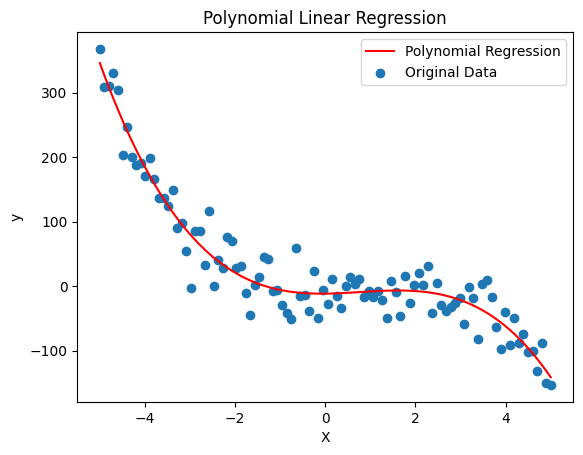

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

"""
Polynomial linear regression is used when the relationship between 
the independent variable(s) and the dependent variable is expected to be non-linear.
It allows us to capture and model non-linear patterns in the data 
by including polynomial terms as additional features.

Non-linear Relationships: 
When analyzing the relationship between the independent and dependent variables,
if there is evidence of a non-linear pattern or curvature, 
polynomial regression can be used to capture and model that relationship more accurately.

The example demonstrates polynomial linear regression 
by generating polynomial features using PolynomialFeatures 
and fitting a linear regression model on these features. 
The inclusion of the polynomial terms allows the model to 
capture non-linear relationships between the features and the target variable,
 making it a polynomial regression model.
"""

# Generate sample data
np.random.seed(0)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = 2 * X + 3 * X**2 - 2 * X**3 + np.random.normal(0, 30, size=X.shape)

"""
polynomial features are generated using the PolynomialFeatures transformer from scikit-learn.
This transformer takes the original feature X and transforms it 
by adding polynomial terms up to a specified degree. 
For example, if the original feature is X, and the specified degree is 3, 
the transformed feature matrix
 will contain X, X^2, and X^3 as additional features.
"""
# Create polynomial features
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)
X_test_poly = poly_features.transform(X_test)
y_pred = model.predict(X_test_poly)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Plot the original data and the polynomial regression curve
plt.scatter(X, y, label='Original Data')
plt.plot(X_test, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Linear Regression')
plt.legend()
plt.show()

